<a href="https://colab.research.google.com/github/lechemrc/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module4-clustering/Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

Your assignment is to use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

It may be helpful to use PCA to reduce the dimensions of your data first in order to obtain --but then again, maybe not. I dunno, you're the data scientist, you tell me.🤪 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [236]:
import pandas as pd
import numpy as np
from numpy import array, mean, cov, std
from numpy.linalg import eig
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df.head()

(569, 33)


id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0    842302         M  ...                  0.11890          NaN
1    842517         M  ...                  0.08902          NaN
2  84300903         M  ...                  0.08758          NaN
3  84348301         M  ...                  0.17300          NaN
4  84358402         M  ...                  0.07678          NaN

[5 rows x 33 columns]

## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [0]:
df = df.drop(['diagnosis'], axis=1)
df.head()

# You take it from here!

See what you can come up with. You have all the know-how! 

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to do PCA on this data to see if that helps you find distinct linearly-separable clusters.
  - (In the real world, truly linearly-separable clusters are rare.)
- You might want to use an elbow chart to decide on the number of clusters to use.
- You might want to use a scree plot to decide how many principal components to include in your clustering.
- You might want to standardize your data before PCA (If you decide to use PCA). 

## Manage your time and don't spend it all on data exploration or something like that. You got this!

#### Exploring the Data

In [238]:
df.describe()

id  radius_mean  ...  fractal_dimension_worst  Unnamed: 32
count  5.690000e+02   569.000000  ...               569.000000          0.0
mean   3.037183e+07    14.127292  ...                 0.083946          NaN
std    1.250206e+08     3.524049  ...                 0.018061          NaN
min    8.670000e+03     6.981000  ...                 0.055040          NaN
25%    8.692180e+05    11.700000  ...                 0.071460          NaN
50%    9.060240e+05    13.370000  ...                 0.080040          NaN
75%    8.813129e+06    15.780000  ...                 0.092080          NaN
max    9.113205e+08    28.110000  ...                 0.207500          NaN

[8 rows x 32 columns]

In [239]:
df.isna().sum()

id                           0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [0]:
# dropping Unnamed:32 based on it having null vals in every row
df = df.drop('Unnamed: 32', axis = 1)

#### Exploring the data to find possible correlations (or interesting relationships to run tests)

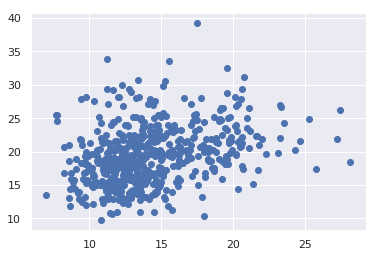

In [241]:
plt.scatter(df['radius_mean'], df['texture_mean'])
plt.show()

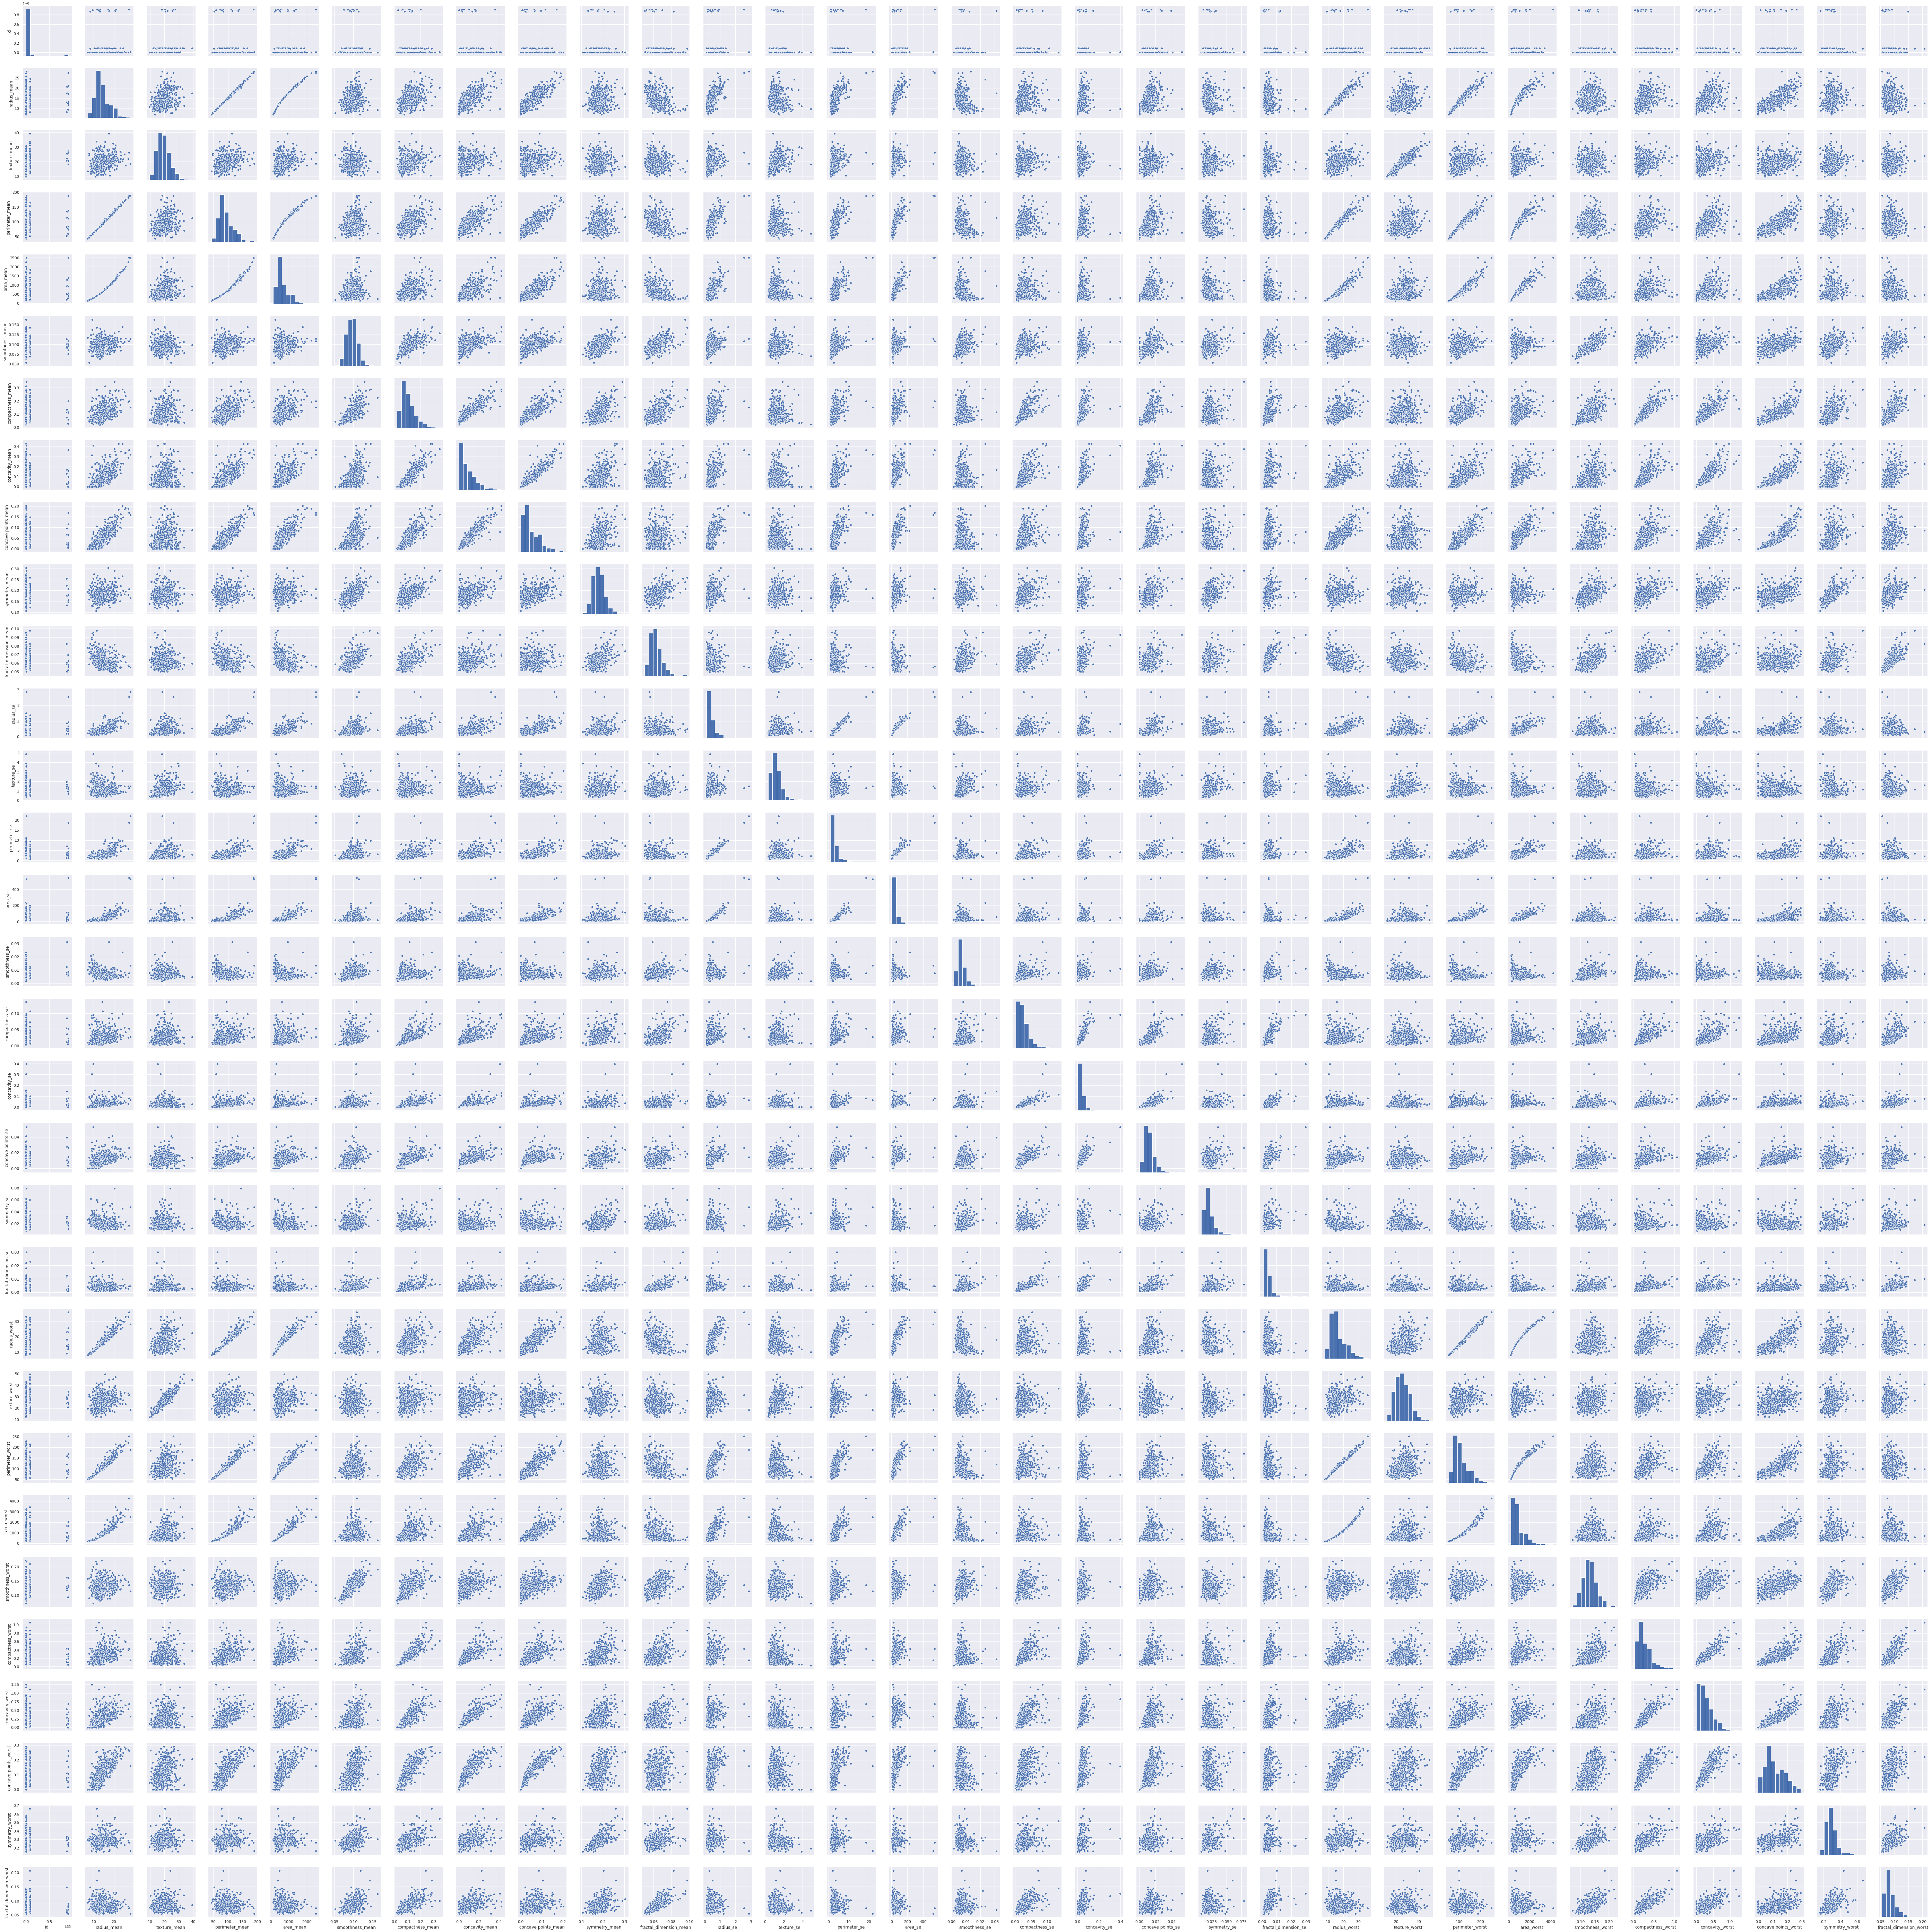

In [253]:
import seaborn as sns

sns.pairplot(df)

# this thing is MASSIVE... not the easiest to interpret, but it gives me the 
# idea of looking into how the means relate to each other

#### Using the elbow method to determine how many clusters to use

In [0]:
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    sum_of_squared_distances.append(km.inertia_)

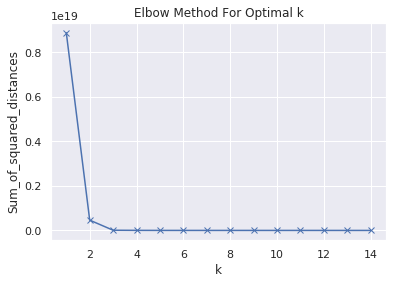

In [264]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# It looks like we should use 3 clusters based on the projection below

#### Applying K means clustering to data set

I will start by using the 'radius_mean' and 'texture_mean' columns

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.datasets.samples_generator import make_blobs

In [266]:
points = df[['radius_mean', 'texture_mean']]
points.head()

radius_mean  texture_mean
0        17.99         10.38
1        20.57         17.77
2        19.69         21.25
3        11.42         20.38
4        20.29         14.34

In [0]:
# X, y = make_blobs(n_samples=100, centers=3, n_features=2)
# df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
# # df.head()

# colors = {0:'red', 1:'blue', 2:'green'}
# fig, ax = plt.subplots()
# grouped = df1.groupby('label')
# for key, group in grouped:
#     group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
# # plt.show() 

In [267]:
centroids = points.sample(3)
centroids.head()

radius_mean  texture_mean
555       10.290         27.61
565       20.130         28.25
539        7.691         25.44

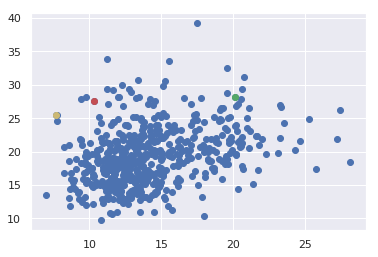

In [268]:
ax = plt.subplot(1,1,1)
ax.scatter(points['radius_mean'], points['texture_mean'])
ax.plot(centroids.iloc[0]['radius_mean'], centroids.iloc[0]['texture_mean'], "or")
ax.plot(centroids.iloc[1]['radius_mean'], centroids.iloc[1]['texture_mean'], "og")
ax.plot(centroids.iloc[2]['radius_mean'], centroids.iloc[2]['texture_mean'], "oy")
plt.show()

In [0]:
import math
import numpy as np
from scipy.spatial import distance


# This is an aggregation of all the calculations needed to cluster n
# number of times for a specified set of data


# Calculate the Nearest Centroid to each data point
def find_nearest_centroid(df, centroids, iteration):

  # calculate the distances between each point and each centroid
  distances = distance.cdist(df, centroids, 'euclidean')
  
  # Get nearest centroid to each point based on distance
  nearest_centroids = np.argmin(distances, axis=1)

  se = pd.Series(nearest_centroids)
  df['cluster_'+iteration] = se.values
  
  return df

# example
# first_pass = find_nearest_centroid(points.select_dtypes(exclude='int64'), centroids, '1')
# first_pass.head()


# --------------------------------------------------


def plot_clusters(df, column_header, centroids):
  '''Plots the clusters being formed by the data'''
  colors = {0:'red', 1:'green', 2:'yellow'}
  fig, ax = plt.subplots()
  ax.plot(centroids.iloc[0].radius_mean, centroids.iloc[0].texture_mean, "ok")
  ax.plot(centroids.iloc[1].radius_mean, centroids.iloc[1].texture_mean, "ok")
  ax.plot(centroids.iloc[2].radius_mean, centroids.iloc[2].texture_mean, "ok")
  grouped = df.groupby(column_header)
  for key, group in grouped:
      group.plot(ax=ax, kind='scatter', x='radius_mean', y='texture_mean', label=key, color=colors[key])
  plt.show()
  
# example
# plot_clusters(first_pass, 'cluster_1', centroids)


# --------------------------------------------------


def get_centroids(df, column_header):
  '''Gets the newly calculated centroid'''
  new_centroids = df.groupby(column_header).mean()
  return new_centroids

# examples
# centroids = get_centroids(first_pass, 'cluster_1')
# centroids

# # Calculate New Centroids
# centroids = get_centroids(first_pass, 'cluster_1')

# # Get Clusters for New Centroids
# second_pass = find_nearest_centroid(first_pass.select_dtypes(exclude='int64'), centroids, '2')

# # Plot New Cluster
# plot_clusters(second_pass, 'cluster_2', centroids)




In [261]:
first_pass = find_nearest_centroid(points.select_dtypes(exclude='int64'), centroids, '1')
first_pass.head()

radius_mean  texture_mean  cluster_1
0        17.99         10.38          0
1        20.57         17.77          0
2        19.69         21.25          0
3        11.42         20.38          2
4        20.29         14.34          0

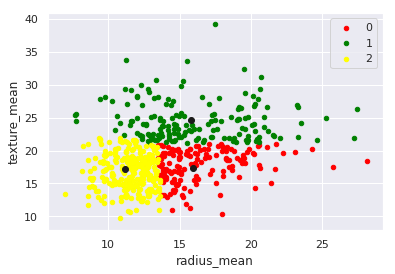

In [270]:
# Calculate New Centroids
centroids = get_centroids(first_pass, 'cluster_1')

# Get Clusters for New Centroids
second_pass = find_nearest_centroid(first_pass.select_dtypes(exclude='int64'), centroids, '2')

# Plot New Cluster
plot_clusters(second_pass, 'cluster_2', centroids)

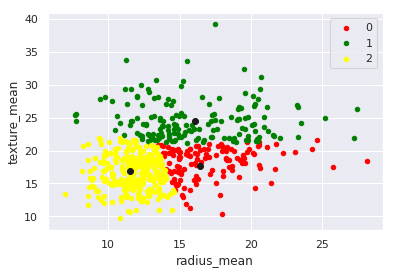

In [271]:
# Calculate New Centroids
centroids = get_centroids(second_pass, 'cluster_2')

# Get Clusters for New Centroids
third_pass = find_nearest_centroid(second_pass.select_dtypes(exclude='int64'), centroids, '3')

# Plot New Cluster
plot_clusters(third_pass, 'cluster_3', centroids)

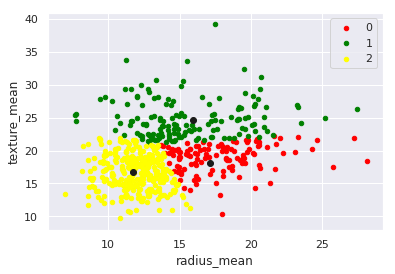

In [272]:
# Calculate New Centroids
centroids = get_centroids(third_pass, 'cluster_3')

# Get Clusters for New Centroids
fourth_pass = find_nearest_centroid(third_pass.select_dtypes(exclude='int64'), centroids, '4')

# Plot New Cluster
plot_clusters(fourth_pass, 'cluster_4', centroids)

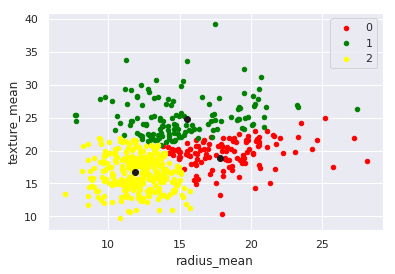

In [273]:
centroids = get_centroids(fourth_pass, 'cluster_4')

# Get Clusters for New Centroids
fifth_pass = find_nearest_centroid(fourth_pass.select_dtypes(exclude='int64'), centroids, '5')

# Plot New Cluster
plot_clusters(fifth_pass, 'cluster_5', centroids)

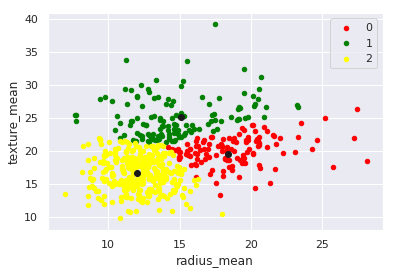

In [274]:
# Calculate New Centroids
centroids = get_centroids(fifth_pass, 'cluster_5')

# Get Clusters for New Centroids
sixth_pass = find_nearest_centroid(fifth_pass.select_dtypes(exclude='int64'), centroids, '6')

# Plot New Cluster
plot_clusters(sixth_pass, 'cluster_6', centroids)

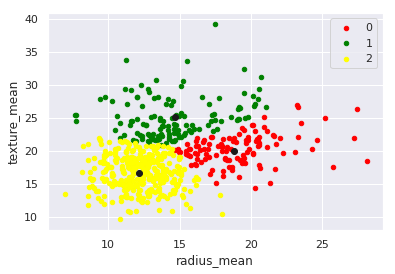

In [275]:
# Calculate New Centroids
centroids = get_centroids(sixth_pass, 'cluster_6')

# Get Clusters for New Centroids
seventh_pass = find_nearest_centroid(sixth_pass.select_dtypes(exclude='int64'), centroids, '7')

# Plot New Cluster
plot_clusters(seventh_pass, 'cluster_7', centroids)

In [276]:
convergence = np.array_equal(sixth_pass['cluster_6'], seventh_pass['cluster_7'])

print("Are we at convergence?? - ", convergence)

Are we at convergence?? -  False


#### Attempting to create my own algorithm to calculate k_means based on selected df columns

-- still working on this -- 


In [0]:
# This is fairly messy, but could be an interesting way to demonstrate the step
# by step by outputting a plot each iteration

def k_means_calc(df_col_1, df_col_2, num):
  '''Runs a clustering calc a specified number of times on a desired dataset,
  or subset, as an aggregation of the three functions above'''
  
  
  
  '''Get initial points and plot scatter with centroids'''
  # needs: df_col_1, df_col_2, num
  points = df[[df_col_1, df_col_2]]
  centroids = points.sample(num)
  
  # scatter plot with centroids
  ax = plt.subplot(1,1,1)
  ax.scatter(points[df_col_1], points[df_col_2])
  ax.plot(centroids.iloc[0][df_col_1], centroids.iloc[0][df_col_2], "or")
  ax.plot(centroids.iloc[1][df_col_1], centroids.iloc[1][df_col_2], "og")
  ax.plot(centroids.iloc[2][df_col_1], centroids.iloc[2][df_col_2], "oy")
  plt.show()
  

  '''Finding the nearest centroid'''
  # needs: df, centroids, iteration
  # calculate the distances between each point and each centroid
  distances = distance.cdist(df, centroids, 'euclidean')
  
  # Get nearest centroid to each point based on distance
  nearest_centroids = np.argmin(distances, axis=1)

  se = pd.Series(nearest_centroids)
  df['cluster_'+iteration] = se.values
  
  
  '''plotting clusters'''
  # needs: df, column_header, centroids
  colors = {0:'red', 1:'green', 2:'yellow'}
  fig, ax = plt.subplots()
  ax.plot(centroids.iloc[0].radius_mean, centroids.iloc[0].texture_mean, "ok")
  ax.plot(centroids.iloc[1].radius_mean, centroids.iloc[1].texture_mean, "ok")
  ax.plot(centroids.iloc[2].radius_mean, centroids.iloc[2].texture_mean, "ok")
  grouped = df.groupby(column_header)
  for key, group in grouped:
      group.plot(ax=ax, kind='scatter', x='radius_mean', y='texture_mean', label=key, color=colors[key])
  plt.show()
  
  
  '''Getting new centroids'''
  # needs: df, column_header
  new_centroids = df.groupby(column_header).mean()
  return new_centroids

#### K_means with sklearn

In [278]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=3)
kmeans.fit(df[['radius_mean', 'texture_mean']])
labels = kmeans.labels_

print(labels)

[1 0 0 2 0 1 0 2 2 2 2 1 0 2 2 2 2 0 0 1 1 1 1 0 0 1 2 0 2 1 0 1 0 0 1 0 2
 1 2 2 2 2 0 2 2 0 1 1 1 2 2 1 1 0 2 1 0 2 1 1 1 2 2 1 2 2 2 1 1 1 0 1 0 1
 1 0 1 0 0 1 2 1 0 0 1 0 2 0 2 1 2 2 1 1 1 0 1 1 1 1 2 1 2 1 1 1 1 1 0 2 1
 2 1 1 1 2 1 1 2 0 1 0 0 1 1 1 2 0 1 0 1 0 0 1 0 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 1 1 1 1 0 0 1 1 1 0 0 2 0 1 1 0 0 1 1 1 1 1 1 1 1 0 2 1 0 0 0 1 2
 1 0 1 1 1 2 2 1 2 2 1 2 0 0 2 1 0 0 2 1 1 1 0 2 1 0 1 0 0 2 1 1 1 0 2 1 1
 1 0 1 1 1 1 2 2 0 2 2 0 1 2 0 0 2 2 1 1 1 2 0 1 1 1 2 1 0 1 0 0 0 1 0 1 2
 2 0 0 0 0 0 0 1 2 1 2 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 2 1 1 1 1 1 1 1 1 1
 1 1 1 2 0 1 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 2 1 1 1 1 1 1 1 2 1 0 1 0 0 1 0 0
 2 1 0 0 1 1 1 2 1 1 1 1 2 1 1 2 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 2 0 1 1 1 2 2 2 2 2 2 1 2 1 1 1 1 1 2 1 2 1 1 2 1 0 0 1 1 1 1 1 1 1 2 1 1
 0 2 2 1 1 0 2 0 2 1 1 2 2 2 2 2 2 0 2 1 1 2 2 1 0 1 1 2 1 2 1 1 2 1 1 0 1
 1 1 1 1 1 1 0 1 0 2 1 0 

In [279]:
new_series = pd.Series(labels)
df['clusters'] = new_series.values

df.head()

id  radius_mean  ...  fractal_dimension_worst  clusters
0    842302        17.99  ...                  0.11890         1
1    842517        20.57  ...                  0.08902         0
2  84300903        19.69  ...                  0.08758         0
3  84348301        11.42  ...                  0.17300         2
4  84358402        20.29  ...                  0.07678         0

[5 rows x 32 columns]

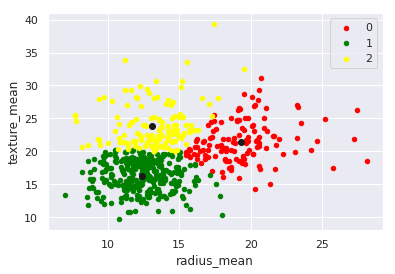

In [280]:
centroids = get_centroids(df, 'clusters')
plot_clusters(df, 'clusters', centroids)

#### Function using the sklearn algorithm

In [0]:
from sklearn.cluster import KMeans 

def get_centroids(df, column_header):
  '''Gets the newly calculated centroid'''
  new_centroids = df.groupby(column_header).mean()
  return new_centroids

def plot_clusters(df, column_header, centroids):
  '''Plots the clusters being formed by the data'''
  
  # plots clusters
  colors = {0:'red', 1:'green', 2:'yellow'}
  fig, ax = plt.subplots()
  ax.plot(centroids.iloc[0]['x'], centroids.iloc[0]['y'], "ok")
  ax.plot(centroids.iloc[1]['x'], centroids.iloc[1]['y'], "ok")
  ax.plot(centroids.iloc[2]['x'], centroids.iloc[2]['y'], "ok")
  grouped = df.groupby(column_header)
  for key, group in grouped:
      group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
  plt.xlabel(centroids.columns[0])
  plt.ylabel(centroids.columns[1])
  plt.show()


# Make sure full dataset is imported correctly to do this 
def sk_k_means(df, df_col_1, df_col_2, iterations=3):
  '''Plots k_means graph and values using sklearn with specified iterations'''
  
  # creating clean df for function
  vals = df[[df_col_1, df_col_2]].rename(columns={df_col_1:'x', df_col_2:'y'})
#   print(vals.head())
  
  # sklearn k_means function
  kmeans = KMeans(n_clusters=iterations)
  kmeans.fit(vals)
  labels = kmeans.labels_
#   print(labels) # for testing 

  new_series = pd.Series(labels)
  vals['clusters'] = new_series.values
#   print(vals.head())

  centroids = get_centroids(vals, 'clusters')
  plot_clusters(vals, 'clusters', centroids)
  print(vals.head())

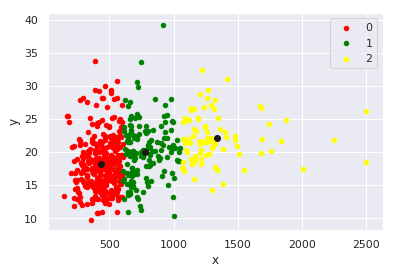

        x      y  clusters
0  1001.0  10.38         1
1  1326.0  17.77         2
2  1203.0  21.25         2
3   386.1  20.38         0
4  1297.0  14.34         2


In [282]:
sk_k_means(df, 'area_mean', 'texture_mean')

### Clustering with PCA / SKLearn
 -- still working on this -- 

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from numpy import array, mean, cov, std
from numpy.linalg import eig
from sklearn.cluster import KMeans 



def get_centroids(df, column_header):
  '''Gets the newly calculated centroid'''
  new_centroids = df.groupby(column_header).mean()
  return new_centroids

def plot_clusters(df, column_header, centroids):
  '''Plots the clusters being formed by the data'''
  
  # plots clusters
  colors = {0:'red', 1:'green', 2:'yellow'}
  fig, ax = plt.subplots()
  ax.plot(centroids.iloc[0]['x'], centroids.iloc[0]['y'], "ok")
  ax.plot(centroids.iloc[1]['x'], centroids.iloc[1]['y'], "ok")
  ax.plot(centroids.iloc[2]['x'], centroids.iloc[2]['y'], "ok")
  grouped = df.groupby(column_header)
  for key, group in grouped:
      group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
  plt.xlabel(centroids.columns[0])
  plt.ylabel(centroids.columns[1])
  plt.show()


# Make sure full dataset is imported correctly to do this 
def k_means(df, df_col_1, df_col_2, iterations=3):
  '''Plots k_means graph and values using sklearn with specified iterations'''
  
  # creating clean df for function
  vals = df[[df_col_1, df_col_2]].rename(columns={df_col_1:'x', df_col_2:'y'})
#   print(vals.head())
  
  # sklearn k_means function
  kmeans = KMeans(n_clusters=iterations)
  kmeans.fit(vals)
  labels = kmeans.labels_
#   print(labels) # for testing 

  new_series = pd.Series(labels)
  vals['clusters'] = new_series.values
#   print(vals.head())

  centroids = get_centroids(vals, 'clusters')
  plot_clusters(vals, 'clusters', centroids)
  print(vals.head())

In [0]:
def pca_analysis(df, df_iloc_vals, target='clusters'):
  ''' This automates a PCA analysis by selecting the columns via
  iloc that you want analyzed along with the target data and then 
  puts it into a k_means cluster analysis using two principal components'''
  
  features = list(df_iloc_vals)
  x = df.loc[:, features].values

  # Separating out the target
  y = df.loc[:,[target]].values

  # Standardizing the features
  x = StandardScaler().fit_transform(x)
  
  pca = PCA(n_components=2)
  principalComponents = pca.fit_transform(x)
  principalDF = pd.DataFrame(data = principalComponents, 
                           columns = ['principal component 1', 
                                      'principal component 2'])

  # Here is the condensed 2 dimensional data set
  # principalDF.head()

  # this is the target data
  # df[['species']].head()
  
  finalDF = pd.concat([principalDF, df[[target]]], axis=1)

  # This is the concatenated dataset with target(species)
  # finalDF.head()

  # explained variance ratio
  print('Explained Variance Ratio:', pca.explained_variance_ratio_.round(decimals=2))
  print(finalDF.head())
  
  

In [284]:
pca_analysis(df, df.iloc[:,0:3])

Explained Variance Ratio: [0.46 0.32]
   principal component 1  principal component 2  clusters
0              -0.748164              -0.135731         1
1               0.900455              -0.649207         0
2               1.495559              -0.099632         0
3              -0.200824               0.568093         2
4               0.522306               0.151425         0


### combined PCA and K-means cluster function

In [0]:
# COMBINED PCA and K_means function

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from numpy import array, mean, cov, std
from numpy.linalg import eig
from sklearn.cluster import KMeans 



def get_centroids(df, column_header):
  '''Gets the newly calculated centroid'''
  new_centroids = df.groupby(column_header).mean()
  return new_centroids

def plot_clusters(df, column_header, centroids):
  '''Plots the clusters being formed by the data'''
  
  # plots clusters - I want to work on this so it can iterate for however
  # many iterations are chosen instead of always just 3
  colors = {0:'red', 1:'green', 2:'yellow'}
  fig, ax = plt.subplots()
  ax.plot(centroids.iloc[0]['x'], centroids.iloc[0]['y'], "ok")
  ax.plot(centroids.iloc[1]['x'], centroids.iloc[1]['y'], "ok")
  ax.plot(centroids.iloc[2]['x'], centroids.iloc[2]['y'], "ok")
  grouped = df.groupby(column_header)
  for key, group in grouped:
      group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
  plt.xlabel(centroids.columns[0])
  plt.ylabel(centroids.columns[1])
  plt.title('K Means Clustering with PCA')
  plt.show()

  

def k_means(df, iterations=3):
  '''Plots k_means graph and values using sklearn with specified iterations'''
  
  # sklearn k_means function
  kmeans = KMeans(n_clusters=iterations)
  kmeans.fit(df)
  labels = kmeans.labels_
#   print(labels) # for testing 

  new_series = pd.Series(labels)
  df['clusters'] = new_series.values
#   print(df.head())

  centroids = get_centroids(df, 'clusters')
  plot_clusters(df, 'clusters', centroids)
  print('\n', df.head())


  
def k_means_pca(df, df_iloc_vals, target='clusters'):
  ''' This automates a PCA analysis by selecting the columns via
  iloc that you want analyzed along with the target data and then 
  puts it into a k_means cluster analysis using two principal components'''
  
  features = list(df_iloc_vals)
  print('Features reduced via PCA:')
  h = len(features)
  for i in range(h):
     print(features[i])
  
  x = df.loc[:, features].values

  # Separating out the target
  y = df.loc[:,[target]].values

  # Standardizing the features
  x = StandardScaler().fit_transform(x)
  
  pca = PCA(n_components=2)
  principalComponents = pca.fit_transform(x)
  principalDF = pd.DataFrame(data = principalComponents, 
                           columns = ['x', 
                                      'y'])

  
  finalDF = pd.concat([principalDF, df[[target]]], axis=1)

  # explained variance ratio
  print('\nExplained Variance Ratio:', pca.explained_variance_ratio_.round(decimals=2), '\n')
  # print(finalDF.head())
  
  k_means(finalDF)

Features reduced via PCA:
smoothness_mean
compactness_mean
concavity_mean
concave points_mean
symmetry_mean

Explained Variance Ratio: [0.73 0.14] 



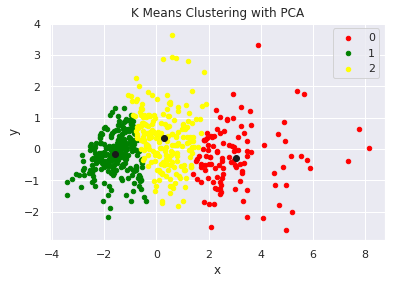


           x         y  clusters
0  5.557398 -0.219692         0
1 -0.321856 -0.549754         2
2  2.869930 -0.403821         0
3  5.674051  1.743784         0
4  1.713197 -1.049988         0


In [331]:
k_means_pca(df, df.iloc[:, 5:10])

# Stretch Goal:

Once you are satisfied with your clustering, go back and add back in the labels from the original dataset to check how accurate your clustering was. Remember that this will not be a possibility in true unsupervised learning, but it might be a helpful for your learning to be able to check your work against the "ground truth". Try different approaches and see which one is the most successful and try understand why that might be the case. If you go back and try different methods don't ever include the actual "diagnosis" labels in your clustering or PCA.

**Side Note** Data Science is never DONE. You just reach a point where the cost isn't worth the benefit anymore. There's always more moderate to small improvements that we could make. Don't be a perfectionist, be a pragmatist.